In [1]:
# General
import numpy as np
import pandas as pd
import re

# Data Exploration

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

In [14]:
#Loding data from csv
df = pd.read_csv("/content/drive/MyDrive/Data Science and Big Data Analytics Lab/Movie-Reviews-Sentiment.csv")

In [15]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [16]:
import nltk
nltk.download('punkt')

df['no_of_chars'] = df['text'].apply(len)
df['no_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['no_of_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,no_of_chars,no_of_words,no_of_sents
0,I grew up (b. 1965) watching and loving the Th...,0,874,174,17
1,"When I put this movie in my DVD player, and sa...",0,1811,393,14
2,Why do people who do not know what a particula...,0,983,205,9
3,Even though I have great interest in Biblical ...,0,351,76,5
4,Im a die hard Dads Army fan and nothing will e...,1,983,223,9


# Exploratory Data Analysis

In [21]:
temp = pd.DataFrame()
temp['Label'] = ['Negative','Positive']
temp['Count'] = [len(df[df['label'] == 0]), len(df[df['label'] == 1])]
temp = temp.sort_values(by = ['Count'], ascending = False)
fig = px.bar(temp, x = 'Label', y = 'Count', 
             color = "Label", text_auto='', width = 600, 
             color_discrete_sequence = ["#AB63FA", "orange"],
             template = 'plotly_dark',
            title = "Count Plot")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

In [23]:
fig = px.pie(temp, values = 'Count', names = 'Label', width = 600, 
             color = 'Label', color_discrete_map = {'Negative': 'rgb(166, 216, 84)', 'Positive': 'rgb(228, 26, 28)'},
             template = 'plotly_dark', title = "Pie Chart")
fig.show()

In [29]:
fig = px.histogram(df, x = 'no_of_chars', color = 'label', 
                   template = 'plotly_dark', 
                   title = "Histogram for Negative vs Positive based on Number of Characters per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [30]:
fig = px.histogram(df, x = 'no_of_words', color = 'label', 
                   template = 'plotly_dark', 
                   title = "Histogram for Negative vs Positive based on Number of Words per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [31]:
fig = px.histogram(df, x = 'no_of_sents', color = 'label', 
                   template = 'plotly_dark', 
                   title = "Histogram for Negative vs Positive based on Number of Sentences per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

**Pair Plot**

In [32]:
fig = px.scatter_matrix(df, dimensions=["no_of_chars", "no_of_words", "no_of_sents"], 
                        color = "label", template = 'plotly_dark', 
                        color_discrete_map = {'Negative': '#19D3F3', 'Positive': '#FF9900'},
                        title = "Pair Plot")
fig.show() 

**Correlation Matrix**

In [33]:
fig = px.imshow(df.corr(), text_auto = True, color_continuous_scale = 'blues', template = 'plotly_dark', title = "Correlation Matrix")
fig.show()

**Word Count Function**

In [34]:
def word_count_plot(data, title):
    word_counter = Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(25)
    most_count = pd.DataFrame(most_count, columns = ['Word', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)
    
    fig = px.bar(most_count, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = title)
    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False, showticklabels = False)
    fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
    fig.show()

**Word Count Plot before Stemming**

In [35]:
word_count_plot(df["text"], "Word Count Plot Before Stemming")

**Creating Corpus**

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
ps = PorterStemmer()

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]', ' ', df['text'][i]) 
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')] # Stemming & Stopwords Removal
    msg = ' '.join(msg)
    corpus.append(msg)

for i in range(0, 5):
    print("Sentence {}: {}".format(i+1,corpus[i]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Sentence 1: grew b watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment
Sentence 2: put movi dvd player sat coke chip expect hope movi would contain strong point first movi awsom anim good flow stori excel voic cast funni comedi kick ass soundtrack disappoint found atlanti milo return read review first might let follow paragraph direct seen first movi enjoy primarili point mention br br first scene appear

In [39]:
df['corpus'] = corpus
df.head()

,text,label,no_of_chars,no_of_words,no_of_sents,corpus
0,I grew up (b. 1965) watching and loving the Th...,0,874,174,17,grew b watch love thunderbird mate school watc...
1,"When I put this movie in my DVD player, and sa...",0,1811,393,14,put movi dvd player sat coke chip expect hope ...
2,Why do people who do not know what a particula...,0,983,205,9,peopl know particular time past like feel need...
3,Even though I have great interest in Biblical ...,0,351,76,5,even though great interest biblic movi bore de...
4,Im a die hard Dads Army fan and nothing will e...,1,983,223,9,im die hard dad armi fan noth ever chang got t...


In [40]:
word_count_plot(corpus, "Word Count Plot After Stemming")

Word Cloud Analysis on Corpus for Positive Reviews

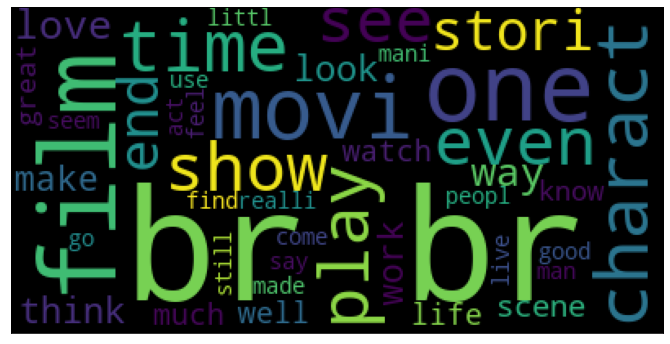

In [42]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
pos_wc = wc.generate(df[df['label'] == 1]['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(pos_wc);

Word Cloud Analysis on Corpus for Negative Reviews

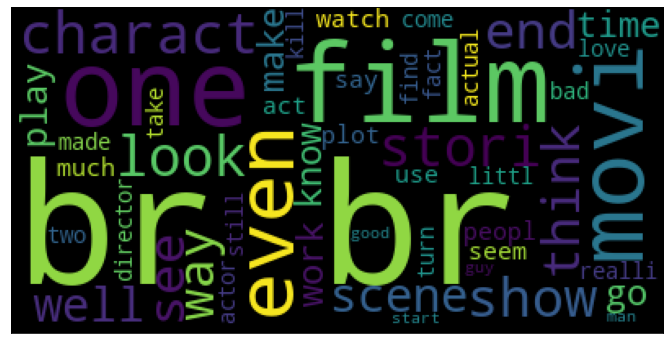

In [43]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
neg_wc = wc.generate(df[df['label'] == 0]['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(neg_wc);

Count Plot for Positive Words

In [45]:
pos_corpus = []

for msg in df[df['label'] == 1]['corpus'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

temp = pd.DataFrame(Counter(pos_corpus).most_common(20), columns = ['Word', 'Count'])

fig = px.bar(temp, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = 'Count Plot for Positive Words')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False, showticklabels = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

Count Plot for Negative Words

In [46]:
pos_corpus = []

for msg in df[df['label'] == 0]['corpus'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

temp = pd.DataFrame(Counter(pos_corpus).most_common(20), columns = ['Word', 'Count'])

fig = px.bar(temp, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = 'Count Plot for Negative Words')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False, showticklabels = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()